In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import img_to_array

In [3]:
# Load your CSV dataset into a pandas DataFrame
df = pd.read_csv("fer.csv")

In [4]:
# Display the first few rows of the DataFrame to understand its structure
print(df.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [5]:
# Drop rows with missing values, if needed
df = df.dropna()

In [6]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 emotion    0
pixels     0
Usage      0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [8]:
# Extract emotion labels, pixel values, and usages from the DataFrame
emotions = df['emotion']
pixels = df['pixels']
usages = df['Usage']
num_classes = 7

In [9]:
# Convert pixels to image arrays and normalize them
def process_pixels(pixel_string):
    pixel_array = np.array(pixel_string.split(), dtype='float32')
    pixel_array = pixel_array.reshape((48, 48, 1))  # Assuming images are grayscale
    pixel_array /= 255.0  # Normalize pixel values
    return pixel_array

In [10]:
X = np.array([process_pixels(pixel) for pixel in pixels])
y = np.array(emotions)
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Define CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])
print(model.summary())


c:\python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309,895 (1.18 MB)

 Trainable params: 309,895 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_val, y_val)
)

Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 168s 182ms/step - accuracy: 0.2526 - loss: 1.8127 - val_accuracy: 0.3707 - val_loss: 1.5880
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 132s 147ms/step - accuracy: 0.4079 - loss: 1.5012 - val_accuracy: 0.4617 - val_loss: 1.3671
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 127s 142ms/step - accuracy: 0.5019 - loss: 1.2980 - val_accuracy: 0.5121 - val_loss: 1.2770
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 159s 177ms/step - accuracy: 0.5480 - loss: 1.1818 - val_accuracy: 0.5513 - val_loss: 1.1950
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 129s 95ms/step - accuracy: 0.5754 - loss: 1.1090 - val_accuracy: 0.5418 - val_loss: 1.2094


In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

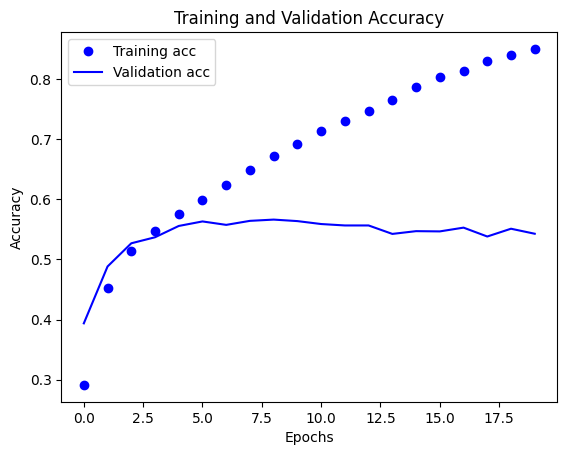

In [ ]:
# Plotting accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

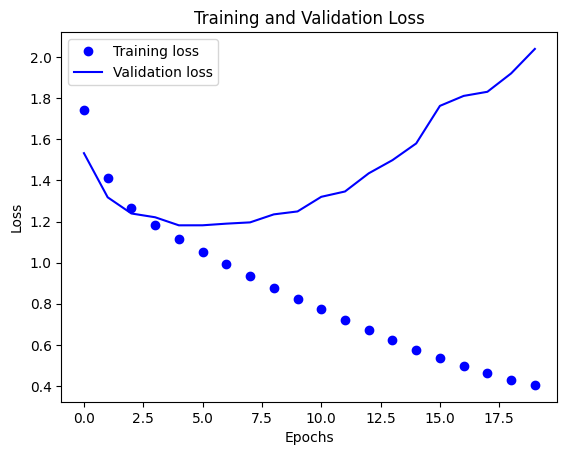

In [ ]:
# Plotting loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the validation data
evaluation = model.evaluate(X_val, y_val)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5444 - loss: 2.0425
Validation Loss: 2.0400969982147217
Validation Accuracy: 0.5427695512771606


In [ ]:
model.save('face.h5')

In [ ]:

y_pred = model.predict(X_val)
y_true = df['emotion']

225/225 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step


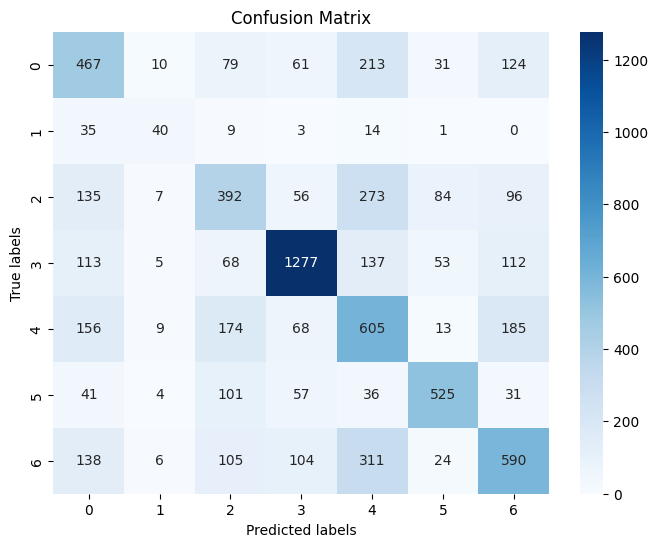

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Assuming y_pred contains probabilities or multiple columns of predictions
# Extract the class predictions (assuming the class with the highest probability is the predicted class)
y_pred_classes = np.argmax(y_pred, axis=1)
# Instantiate LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the class predictions to integer format
y_val_encoded = label_encoder.fit_transform(y_val)
y_pred_encoded = label_encoder.fit_transform(y_pred_classes)
# Now compute the confusion matrix using the encoded labels
conf_matrix = confusion_matrix(y_val_encoded, y_pred_encoded)
# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
